# Pose Detection with OpenPose

This notebook uses an open source project [CMU-Perceptual-Computing-Lab/openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose.git) to detect/track multi person poses on a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install OpenPose

In [1]:
!ls

!rm -r openpose

sample_data
rm: cannot remove 'openpose': No such file or directory


In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`

Selecting previously unselected package libgflags2.2.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

## Detect poses on a test video

We are going to detect poses on the following youtube video:

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!ls /content

!ls /


cmake-3.13.0-Linux-x86_64.tar.gz  gdrive  openpose  sample_data
bin	 datalab  home	 lib64	opt	    root  srv		     tmp    var
boot	 dev	  lib	 media	proc	    run   sys		     tools
content  etc	  lib32  mnt	python-apt  sbin  tensorflow-1.15.2  usr


Download the above youtube video, remove the first 15 seconds and do the pose detection on the next 5 seconds:

In [ ]:
!cd openpose && ./build/examples/openpose/openpose.bin --video "/content/gdrive/MyDrive/ExpressiveRobot/May2/IMG_4010.MOV"\
 --write_json "/content/gdrive/MyDrive/ExpressiveRobot/May2/Full/4010" --display 0 --write_video "/content/gdrive/MyDrive/ExpressiveRobot/May2/Full/4010.avi" --face --hand

!cd openpose && ./build/examples/openpose/openpose.bin --video "/content/gdrive/MyDrive/ExpressiveRobot/May2/IMG_4011.MOV"\
 --write_json "/content/gdrive/MyDrive/ExpressiveRobot/May2/Full/4011" --display 0 --write_video "/content/gdrive/MyDrive/ExpressiveRobot/May2/Full/4011.avi" --face --hand

!cd openpose && ./build/examples/openpose/openpose.bin --video "/content/gdrive/MyDrive/ExpressiveRobot/May2/IMG_4012.MOV"\
 --write_json "/content/gdrive/MyDrive/ExpressiveRobot/May2/Full/4012" --display 0 --write_video "/content/gdrive/MyDrive/ExpressiveRobot/May2/Full/4012.avi" --face --hand

!cd openpose && ./build/examples/openpose/openpose.bin --video "/content/gdrive/MyDrive/ExpressiveRobot/May2/IMG_4013.MOV"\
 --write_json "/content/gdrive/MyDrive/ExpressiveRobot/May2/Full/4013" --display 0 --write_video "/content/gdrive/MyDrive/ExpressiveRobot/May2/Full/4013.avi" --face --hand

!cd openpose && ./build/examples/openpose/openpose.bin --video "/content/gdrive/MyDrive/ExpressiveRobot/May2/IMG_4014.MOV"\
 --write_json "/content/gdrive/MyDrive/ExpressiveRobot/May2/Full/4014" --display 0 --write_video "/content/gdrive/MyDrive/ExpressiveRobot/May2/Full/4014.avi" --face --hand

!cd openpose && ./build/examples/openpose/openpose.bin --video "/content/gdrive/MyDrive/ExpressiveRobot/May2/IMG_4015.MOV"\
 --write_json "/content/gdrive/MyDrive/ExpressiveRobot/May2/Full/4015" --display 0 --write_video "/content/gdrive/MyDrive/ExpressiveRobot/May2/Full/4015.avi" --face --hand

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 547.526898 seconds.
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 996.867985 seconds.
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Empty frame detected, frame number 3814 of 3815. In /content/openpose/src/openpose/producer/producer.cpp:checkFrameIntegrity():290
Empty frame detected, frame number 3814 of 3815. In /content/openpose/src/openpose/producer/producer.cpp:checkFrameIntegrity():290
Empty frame detected, frame number 3814 of 3815. In /content/openpose/src/openpose/producer/producer.cpp:checkF

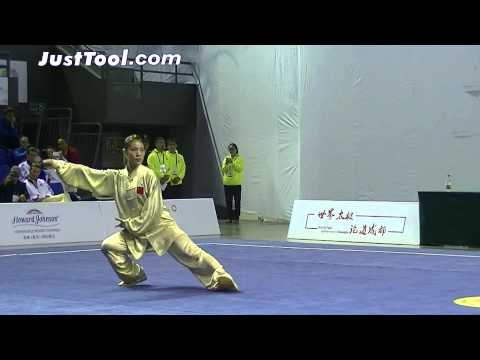

In [ ]:
from IPython.display import YouTubeVideo
YOUTUBE_ID = 'RA8iHFarIng'


YouTubeVideo(YOUTUBE_ID)

In [ ]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -ss 00:00:59.0 -t 180 video.mp4
# detect poses on the these 5 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json /content/gdrive/MyDrive/ExpressiveRobot/May31/taichi --display 0 --write_video /content/gdrive/MyDrive/ExpressiveRobot/May31/tc.avi --face --hand --number_people_max 1


[youtube] RA8iHFarIng: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 65.66MiB in 24:38
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis 

In [ ]:
!cp /content/openpose.avi /content/gdrive/MyDrive/ExpressiveRobot/May31
!cp -R /content/openpose/output/ /content/gdrive/MyDrive/ExpressiveRobot/May31

openpose.avi			   video_000000001500_keypoints.json
video_000000000000_keypoints.json  video_000000001501_keypoints.json
video_000000000001_keypoints.json  video_000000001502_keypoints.json
video_000000000002_keypoints.json  video_000000001503_keypoints.json
video_000000000003_keypoints.json  video_000000001504_keypoints.json
video_000000000004_keypoints.json  video_000000001505_keypoints.json
video_000000000005_keypoints.json  video_000000001506_keypoints.json
video_000000000006_keypoints.json  video_000000001507_keypoints.json
video_000000000007_keypoints.json  video_000000001508_keypoints.json
video_000000000008_keypoints.json  video_000000001509_keypoints.json
video_000000000009_keypoints.json  video_000000001510_keypoints.json
video_000000000010_keypoints.json  video_000000001511_keypoints.json
video_000000000011_keypoints.json  video_000000001512_keypoints.json
video_000000000012_keypoints.json  video_000000001513_keypoints.json
video_000000000013_keypoints.json  video_0000000015

In [ ]:

# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4
! cd openpose && ./build/examples/openpose/openpose.bin --video examples/media/video.avi --display 0  --write_video ./output/openpose.avi
! ffmpeg -i "./openpose/output/openpose.avi" -c:v libvpx-vp9 -b:v 1000K -r 30 -threads 8 -speed 1 -tile-columns 6 -frame-parallel 1 -auto-alt-ref 1 -lag-in-frames 25 -c:a libopus -b:a 64k -f webm -y out.webm

from IPython.display import HTML
import base64
import io

video = io.open('./output/openpose.avi', 'r+b').read()
encoded = base64.b64encode(video)
data  = '''
<video id="out" width="1280" height="720" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>
'''.format(encoded.decode('ascii'))

HTML(data)

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

FileNotFoundError: ignored